In [52]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn

plt.style.use("seaborn")

In [53]:
df_raw = pd.read_csv("../data/processed/data.csv", index_col = 0)

df = df_raw[df_raw.columns[1:]]
df = df.drop_duplicates()
df = df.sort_values("kreis_key").reset_index(drop=True)
df = df[["kreis_key", "kreis_name",  "income_pp_2018", "income_2018", "crimes_2018", "population_2018", "crimes_pp_2018"]]
df = df.dropna()
df.kreis_key = df.kreis_key.astype(int).astype(str).str.zfill(5)
df.income_pp_2018 = pd.to_numeric(df.income_pp_2018)

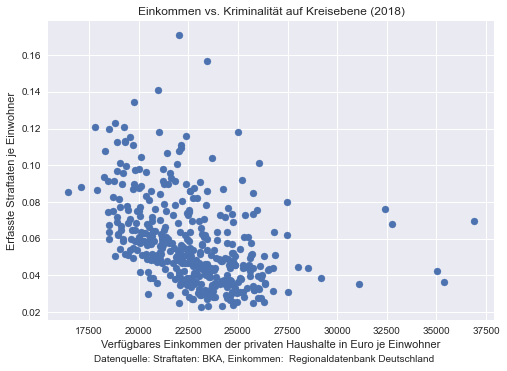

In [54]:
# income vs crimes

def scatter_plt(df, filename_postfix =""):

    X = np.array(df.income_pp_2018).reshape(-1, 1)
    y = df.crimes_pp_2018


    plt.scatter(X, y)

    plt.title("Einkommen vs. Kriminalität auf Kreisebene (2018)")
    plt.xlabel("Verfügbares Einkommen der privaten Haushalte in Euro je Einwohner")
    plt.ylabel("Erfasste Straftaten je Einwohner")

    plt.figtext(0.5, 0.02, "Datenquelle: Straftaten: BKA, Einkommen:  Regionaldatenbank Deutschland", ha="center", fontsize=10)

    plt.savefig(os.path.join(".." , "output" ,  f"crimes_vs_income_2018{filename_postfix}.png.png"))
    plt.show()
    plt.close()

scatter_plt(df)

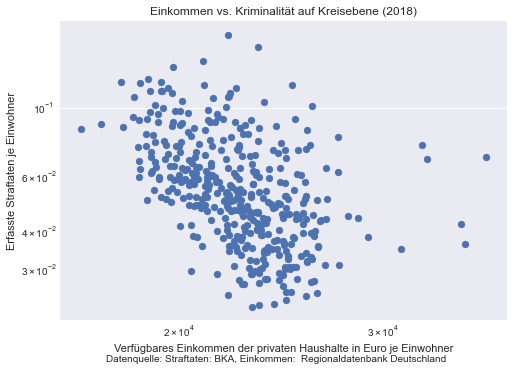

In [55]:
# income vs crimes
def scatter_plt_log_log(df, filename_postfix = ""):
    X= np.array(df.income_pp_2018).reshape(-1, 1)
    y  = df.crimes_pp_2018

    ax = plt.gca()

    ax.set_xscale("log")
    ax.set_yscale("log")

    plt.scatter(X, y)

    plt.title("Einkommen vs. Kriminalität auf Kreisebene (2018)")
    plt.xlabel("Verfügbares Einkommen der privaten Haushalte in Euro je Einwohner")
    plt.ylabel("Erfasste Straftaten je Einwohner")

    plt.figtext(0.5, 0.02, "Datenquelle: Straftaten: BKA, Einkommen:  Regionaldatenbank Deutschland", ha="center", fontsize=10)

    plt.savefig(os.path.join(".." , "output" ,  f"crimes_vs_income_2018_log_log{filename_postfix}.png"))
    plt.show()
    plt.close()
    
scatter_plt_log_log(df)

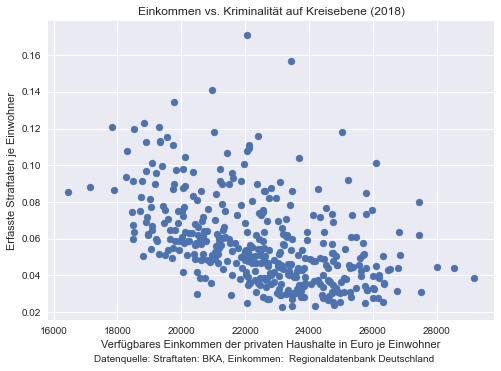

In [56]:
## Remove Outlier
df_no_outlier = df[df.income_pp_2018 < 3*10**4]

scatter_plt(df_no_outlier, "_no_outlier")



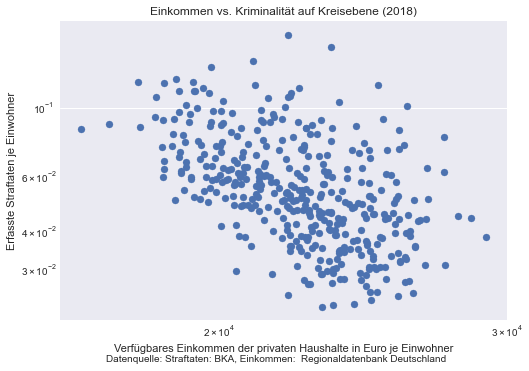

In [57]:
scatter_plt_log_log(df_no_outlier, "_no_outlier")